In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
train = pd.read_csv('CIFARtrain.csv')
test = pd.read_csv('CIFARtest.csv')

In [3]:
train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1


In [4]:
x_train = train.iloc[:,0:3072]
x_train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071
0,59,43,50,68,98,119,139,145,149,149,...,59,58,65,59,46,57,104,140,84,72
1,154,126,105,102,125,155,172,180,142,111,...,22,42,67,101,122,133,136,139,142,144
2,255,253,253,253,253,253,253,253,253,253,...,78,83,80,69,66,72,79,83,83,84
3,28,37,38,42,44,40,40,24,32,43,...,53,39,59,42,44,48,38,28,37,46
4,170,168,177,183,181,177,181,184,189,189,...,92,88,85,82,83,79,78,82,78,80


In [5]:
x_test = test.iloc[:,0:3072]

In [6]:
y_train = train['label']

In [7]:
x_train.shape

(50000, 3072)

In [8]:
x_test.shape

(10000, 3072)

In [9]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [10]:
model = Sequential()
model.add(Flatten(input_shape = (3072,)))
model.add(Dense(50,activation = 'relu'))
model.add(Dense(20,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [11]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [12]:
from keras.utils import to_categorical

Y_train = to_categorical(y_train, 10)

model.fit(x_train,Y_train,epochs=30, batch_size=100)

Epoch 1/30
500/500 [==============================] - 2s 3ms/step - loss: 2.0560 - accuracy: 0.2551
Epoch 2/30
500/500 [==============================] - 2s 3ms/step - loss: 1.8616 - accuracy: 0.3358
Epoch 3/30
500/500 [==============================] - 2s 3ms/step - loss: 1.7994 - accuracy: 0.3607
Epoch 4/30
500/500 [==============================] - 1s 3ms/step - loss: 1.7575 - accuracy: 0.3756
Epoch 5/30
500/500 [==============================] - 1s 3ms/step - loss: 1.7229 - accuracy: 0.3897
Epoch 6/30
500/500 [==============================] - 1s 2ms/step - loss: 1.6890 - accuracy: 0.4009
Epoch 7/30
500/500 [==============================] - 1s 2ms/step - loss: 1.6620 - accuracy: 0.4131
Epoch 8/30
500/500 [==============================] - 1s 2ms/step - loss: 1.6436 - accuracy: 0.4183
Epoch 9/30
500/500 [==============================] - 1s 2ms/step - loss: 1.6203 - accuracy: 0.4276
Epoch 10/30
500/500 [==============================] - 1s 3ms/step - loss: 1.6022 - accuracy: 0.4331

In [13]:
x_test.shape

(10000, 3072)

In [14]:
X_test = x_test.to_numpy().reshape(x_test.shape[0],32,32,3)

In [15]:
X_test.shape

(10000, 32, 32, 3)

In [16]:
X_train = x_train.to_numpy().reshape(x_train.shape[0], 32,32,3)

In [17]:
pred = model.predict(x_test)

313/313 [==============================] - 0s 871us/step


pixel_0       0.584314
pixel_1       0.611765
pixel_2       0.666667
pixel_3       0.635294
pixel_4       0.643137
                ...   
pixel_3067    0.580392
pixel_3068    0.560784
pixel_3069    0.603922
pixel_3070    0.501961
pixel_3071    0.509804
Name: 129, Length: 3072, dtype: float32


(-0.5, 31.5, 31.5, -0.5)

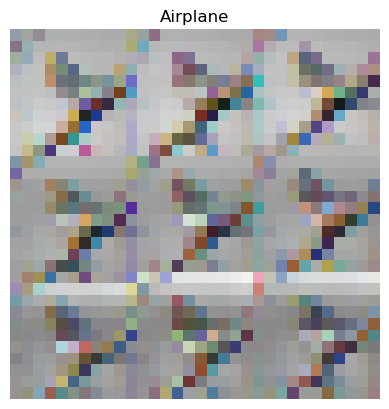

In [23]:
import numpy as np
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

import random

n = random.randint(0,1000)
pred_ind = np.argmax(pred[n])
pred_class = class_names[pred_ind]
plt.imshow(X_test[n])
print(x_test.iloc[n])
plt.title(pred_class)
plt.axis('off')